# Nonlinear Dimensionality Reduction (Manifold learning)

In [1]:
%matplotlib inline

In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

In [3]:
sns.set(style='white')

In [4]:
d1 = pd.read_csv('data/data1.csv', sep=';', header=None)
samples = 10000 # bumber of samples from whole dataset
d1_subset = d1.sample(samples)
print('rows, columns:', d1_subset.shape)
d1_subset.head()

rows, columns: (10000, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
13109,0.3380,2.3377,3.0642,1.8056,2.9896,2.5199,1.9036,0.9840,-0.1942,0.7991,0.5256,0.0248,0.3578,1.5174
37324,2.9363,2.7884,2.2814,2.4616,2.0128,2.6510,2.7525,0.2027,0.4733,0.1521,0.6101,0.6811,0.0774,3.0926
29666,2.4928,2.1093,2.5786,2.2775,2.0846,3.0555,3.0483,0.5561,0.3410,0.2033,0.7539,0.8916,0.7630,5.2494
14907,1.1818,2.7041,1.9449,2.9599,1.8954,2.5497,3.1476,0.0705,0.8019,0.0724,0.5263,0.9611,0.5851,2.9813
14293,1.9994,2.5810,1.8271,2.0298,2.8894,2.8189,2.3487,0.0181,0.1608,0.7788,0.5146,0.3917,0.0929,14.2417


In [5]:
n = 13  # number of inputs
input_indices = list(range(n))
x = d1_subset[input_indices]
y = d1_subset[n]

## Isomap

In [6]:
isomap = Isomap()
x_reduced = pd.DataFrame(isomap.fit_transform(x))

In [7]:
print('rows, columns:', x_reduced.shape)
x_reduced.head()

rows, columns: (10000, 2)


,0,1
0,-0.002726,0.002363
1,-0.002656,0.002239
2,-0.002687,0.002288
3,-0.002649,0.002229
4,-0.002723,0.002356


In [8]:
x_reduced.index = x.index
d = pd.concat([x_reduced, y], axis=1)
d.columns = ['x1', 'x2', 'y']
d.head()

,x1,x2,y
13109,-0.002726,0.002363,1.5174
37324,-0.002656,0.002239,3.0926
29666,-0.002687,0.002288,5.2494
14907,-0.002649,0.002229,2.9813
14293,-0.002723,0.002356,14.2417


## Scatter Plot

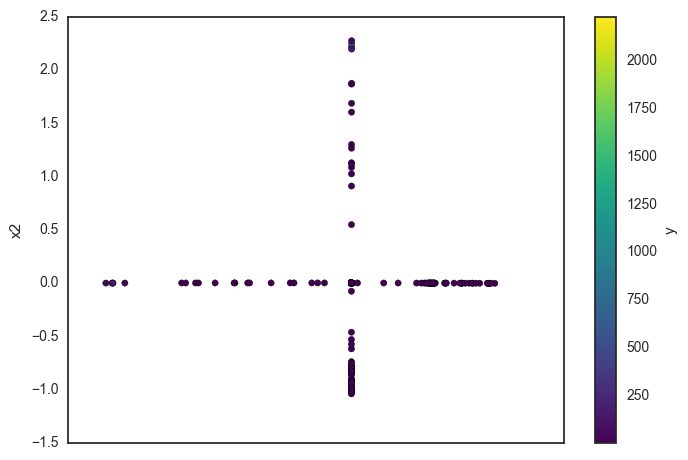

In [9]:
d.plot.scatter(x='x1', y='x2', c='y', cmap='viridis');

## Hexbin Plot

<function __main__.plot_hexbin>

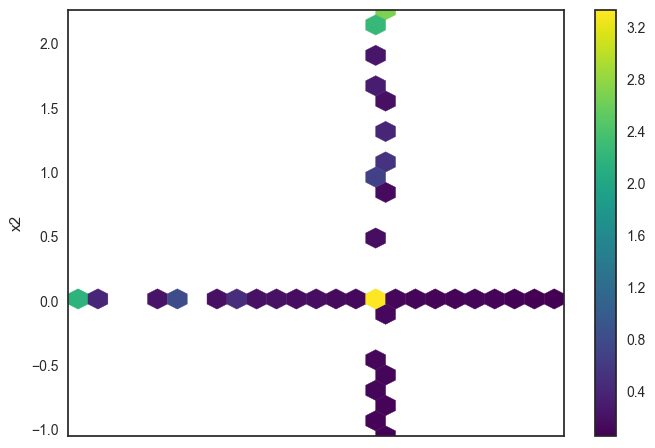

In [10]:
def plot_hexbin(gridsize, logscale, maximum):
    d.plot.hexbin(x='x1', y='x2', C='y',
                  bins='log' if logscale else None,
                  gridsize=gridsize,
                  reduce_C_function=np.max if maximum else np.mean,
                  cmap='viridis')

gridsize = widgets.IntSlider(min=10, max=100, step=5, value=25, description='grid size')
widgets.interact(plot_hexbin, gridsize=gridsize, logscale=True, maximum=True)
# assumes we are intersted in maximization

## t-SNE

In [11]:
tsne = TSNE(n_components=2, )
x_reduced = pd.DataFrame(tsne.fit_transform(x))

In [13]:
print('rows, columns:', x_reduced.shape)
x_reduced.head()

rows, columns: (10000, 2)


,0,1
0,5.914253,8.159882
1,0.666015,-6.827571
2,-5.652083,9.002018
3,9.691183,0.890233
4,-3.665643,8.365007


In [14]:
x_reduced.index = x.index
d = pd.concat([x_reduced, y], axis=1)
d.columns = ['x1', 'x2', 'y']
d.head()

,x1,x2,y
13109,5.914253,8.159882,1.5174
37324,0.666015,-6.827571,3.0926
29666,-5.652083,9.002018,5.2494
14907,9.691183,0.890233,2.9813
14293,-3.665643,8.365007,14.2417


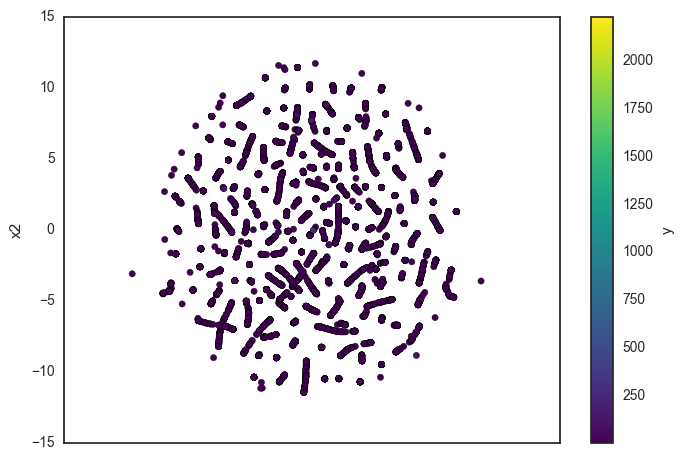

In [15]:
d.plot.scatter(x='x1', y='x2', c='y', cmap='viridis');

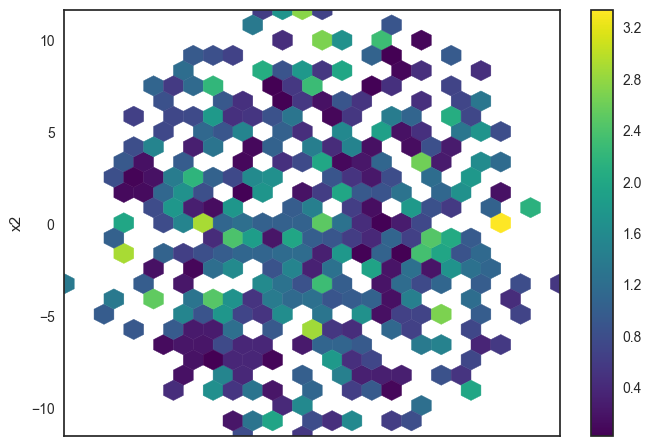

In [16]:
def plot_hexbin(gridsize, logscale, maximum):
    d.plot.hexbin(x='x1', y='x2', C='y',
                  bins='log' if logscale else None,
                  gridsize=gridsize,
                  reduce_C_function=np.max if maximum else np.mean,
                  cmap='viridis')

gridsize = widgets.IntSlider(min=10, max=100, step=5, value=25, description='grid size')
widgets.interact(plot_hexbin, gridsize=gridsize, logscale=True, maximum=True)
# assumes we are intersted in maximization